<a href="https://colab.research.google.com/github/akshar1277/Pytorch_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Pytorch workflow






In [ ]:
what_were_covering={
    1:'data preapare and load',
    2:'build model',
    3:'fitting the model to data(training)',
    4:'making predictions and evaluting a model',
    5:'saving and loading a model',
    6:'putting it all together'
}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check pytorch verison
torch.__version__


'2.1.0+cu121'

### 1.Data (preparing and loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numeraical represantation
2. Build pattern from numeriacal data

To showcase this let;s create some *known* data using linear regression formula.
We'll use a linear regression formula to make a straight line with known parameter


In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X, y


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [ ]:
len(X),len(y)

(50, 50)

###splitting data into training and testing

In [ ]:
train_split=int(0.8 * len(X))
train_split

40

In [ ]:
x_train,y_train=X[:train_split],y[:train_split]
x_test,y_test=X[train_split:],y[train_split:]

len(x_train),len(y_train),len(x_test),len(y_test)



(40, 40, 10, 10)

### visualise data


In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None
                     ):
  plt.figure(figsize=(10,7))
# training data
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing  data")

  if predictions is not None:
    # ploat the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")
  plt.legend(prop={"size":12})

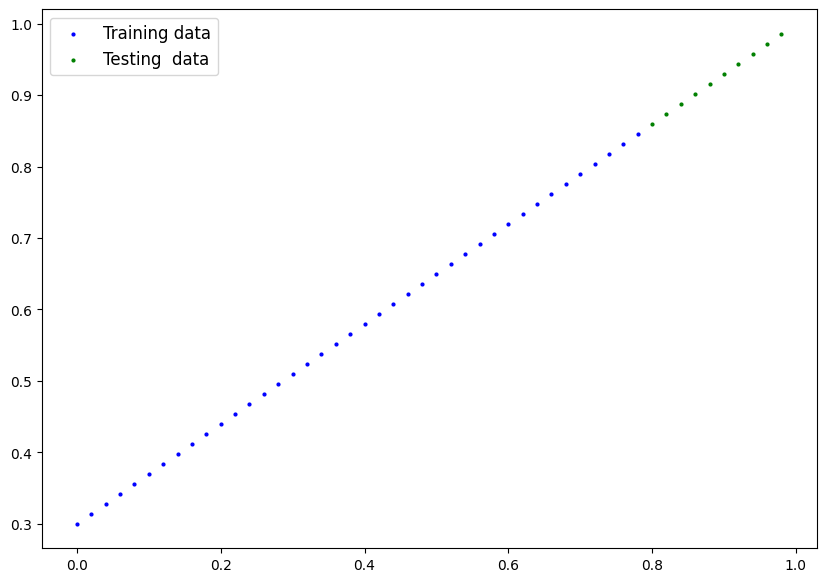

In [ ]:
plot_predictions()

### 2. Build  model

what our model does:
* start with random values (weight & bias)
*Look at training data and adjust the random values to better represent the ideal values (the weight and bias values we used to create the data)

How does it do so?
1. gradiant desent
2. backpropogation

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module): #-> nn is base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,
                                       dtype=torch.float32))

  #Forward method to define the computation in the model
  def forward(self,x: torch.Tensor)->torch.Tensor:  #->x is input data
    return self.weights * x + self.bias


 ### checking the contents of our pytorch model


 so we can checkout our model parameters or what's inside our model using .parameters()


In [ ]:
torch.manual_seed(42) #create random seed

#create an instance of the model
model_0 = LinearRegressionModel()

#check out parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# lsit named parametes
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predication using torch.inference_mode()

To check our model's predictive power let's see how well it predicts y_test based on x_test

when we pass data through our model ,it's going to run it through the forward() method

In [ ]:
# makke predictions with model
with torch.inference_mode():#inference mode shut the grad_fn . becasue we are not doing training we dont need gradiant.
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

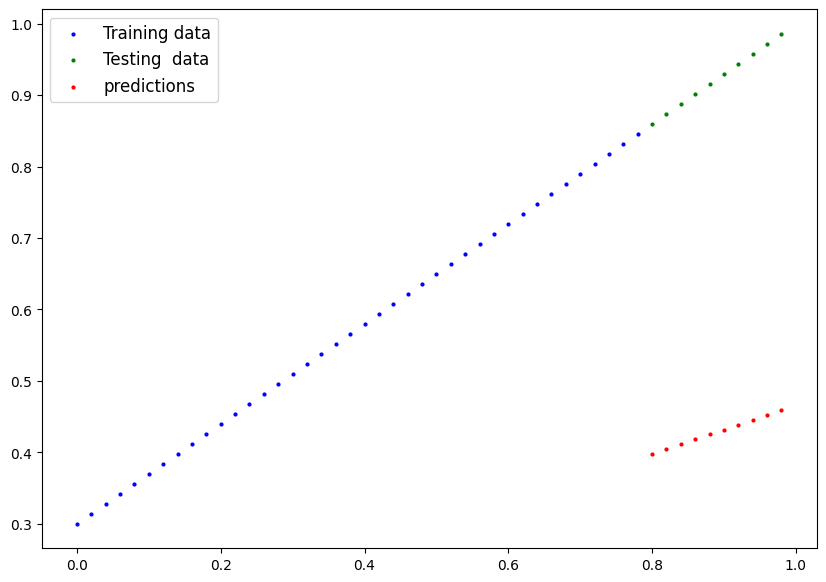

In [ ]:
plot_predictions(predictions=y_preds )

### 3.Train Model

The whole idea of training is for a model to move from some *unknown* parameters to some *known* parameters.

or in other words from a poor representation of the data to a better representatin of the data

one way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note : loss function may also be called cost function or criterion
* **Loss function:** mesuaremnt of how far prediction from actual value

* **Optimizer:** Takes into account the loss of a model;s parameter and adjusts the model;s parameter to improve the loss function  

And specifically for pytorch we need
->training loop
->testing loop

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setup loss function

loss_fn=nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr=learning rate =possibly the most important hyperparameter you can set






### Building a training loop and testing loop in pytorch

A couple of things we need in train loop:
0. Loop through the data
1. forward pass (this involves data moving through our model's `forward()` functions
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. Loss backward - move backwardthrough the network to calculate the gradients of each of the parameters of our model with respect to the loss.(**backpropagation**)
5. Optimizer step - use the optimizer to adjuct our model's parameters to try and improve the loss (**gradiant decent**)



In [ ]:



torch.manual_seed(42)
# epoch is one loop through the data.. (this is a hyperparamer because we've set it by us)
epochs=200

epoch_count=[]
loss_values=[]
test_loss_values=[]


# 0. Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train()  #train mode in pytorch sets all parameter that require gradients to require gradients


  # 1. Forward pass
  y_pred=model_0(x_train)

  #2. calculate loss
  loss= loss_fn(y_pred,y_train)
  # print(loss)
  #3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backprapogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5 . step the optimizer
  optimizer.step() #by default how the optimizer chages will acculumate throgh the loop so.. we have to zero them above in step 3


  model_0.eval()#turns off gradient traking which is not need for testing (dropout/batchnom layes)

  with torch.inference_mode():#this turns of gradient tracking & a couple more things behind the scens
    # 1. Do the Froward pass
    test_pred=model_0(x_test)

    # 2. calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    #



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

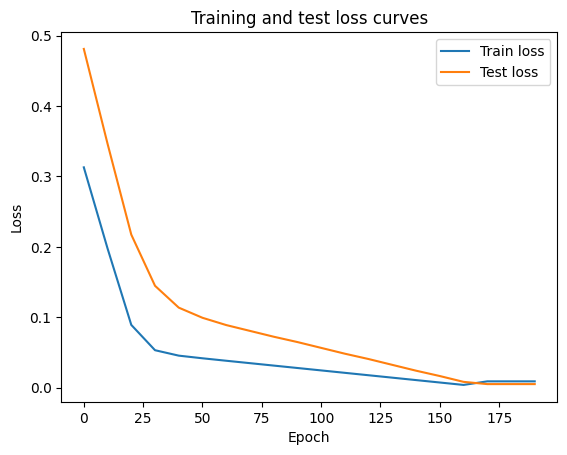

In [ ]:
# plot the loss curves
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

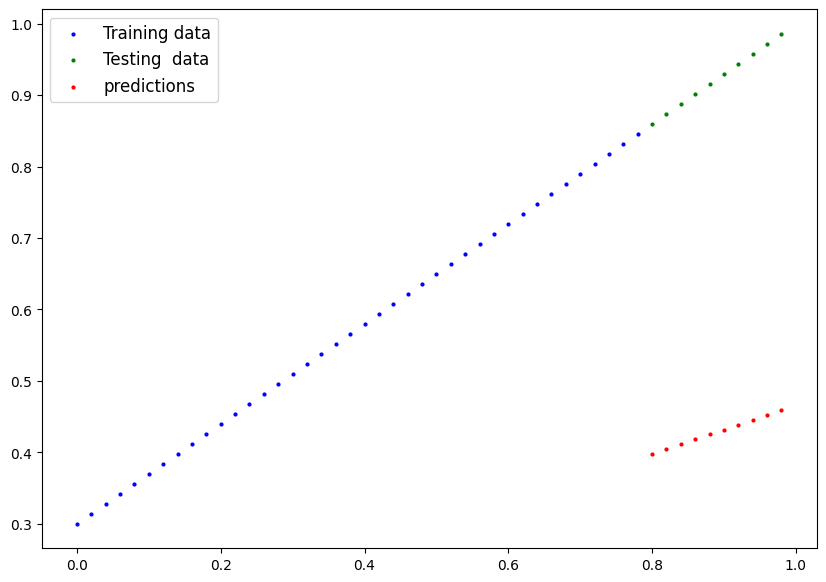

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(x_test)

plot_predictions(predictions=y_preds);


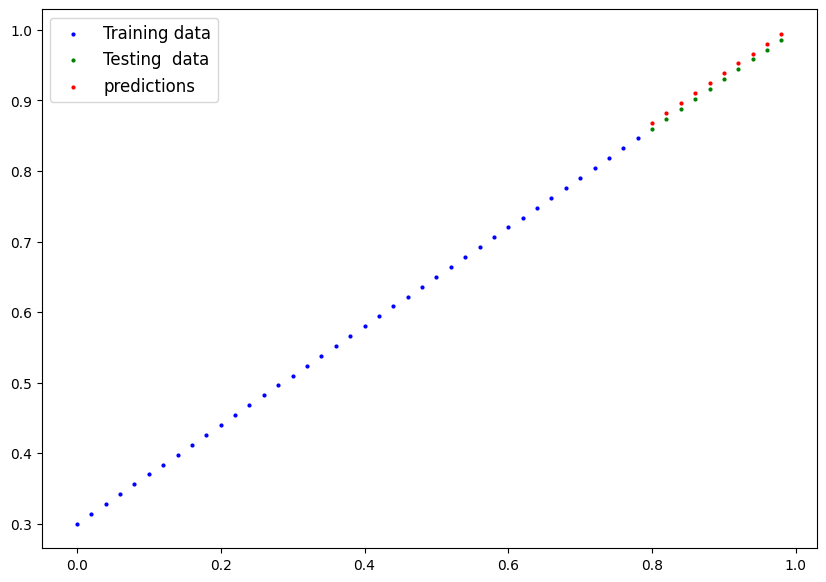

In [ ]:
plot_predictions(predictions=y_preds_new);

###Saving a model in Pytorch

There are three main methods you should about for saving and loading models in PyTorch

1. `torch.save()` - allows you save PyTorch object in python's pickle format
2.`torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary




In [ ]:
# saving our Pytorch model
!pip install pathlib2
from pathlib import Path


# 1. Create models directory

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. create model save path
MODEL_NAME="01_pytorch_workflow_mode_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)



saving model to : models/01_pytorch_workflow_mode_0.pth


## loading python model

since we saved our model's `state_dict()` rathen the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0=LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# make some models pres
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(x_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together



In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.1.0+cu121'

Create device-agnostic code

This means if we've got access to a GPU,our code will use it (for potentially faster computing).

if no GPU is available the code will default to using CPU

In [ ]:
# setup device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")


Using device:cuda



#6.1 Data

In [ ]:
# create some data using the linear regression formula
weight=0.7
bias=0.3

# Create range values
start=0
end=1
step=0.02

# create x and Y (features and label)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# split data
train_split =int (0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

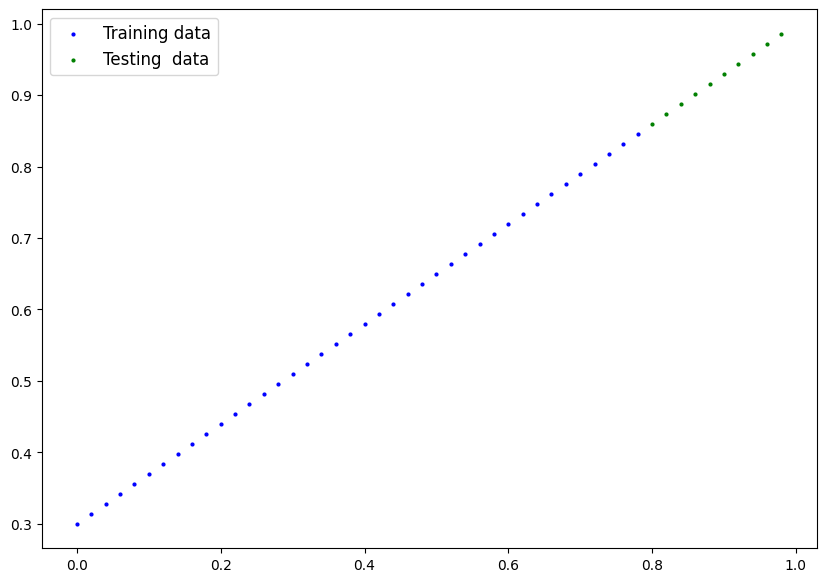

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test)

# 6.2 Building Pytroch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters , also called: linear transform , probing layer, fully connected layer, dense layer
    self.linear_layer=nn.Linear(in_features=1,out_features=1)

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)


# set the manual seed
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

### 6.3 Training

For training we need

* Loss function
* Optimizer
* Training loop
* Testing loop


In [ ]:
loss_fn=nn.L1Loss()

# setup an optimizer (stochastic gradient descent)
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01) #lr=learning rate =possibly the most important hyperparameter you can set


In [ ]:
# Let's write a training loop

torch.manual_seed(42)
epochs=200

#put data on targeted device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()  #train mode in pytorch sets all parameter that require gradients to require gradients


  # 1. Forward pass
  y_pred=model_1(X_train)

  #2. calculate loss
  loss= loss_fn(y_pred,y_train)
  # print(loss)
  #3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backprapogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5 . step the optimizer
  optimizer.step() #by default how the optimizer chages will acculumate throgh the loop so.. we have to zero them above in step 3


  model_1.eval()#turns off gradient traking which is not need for testing (dropout/batchnom layes)

  with torch.inference_mode():#this turns of gradient tracking & a couple more things behind the scens
    # 1. Do the Froward pass
    test_pred=model_1(X_test)

    # 2. calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
weigh,bias


NameError: name 'weigh' is not defined

In [ ]:
weight , bias

(0.7, 0.3)

In [ ]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds=model_1(X_test)
y_preds


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

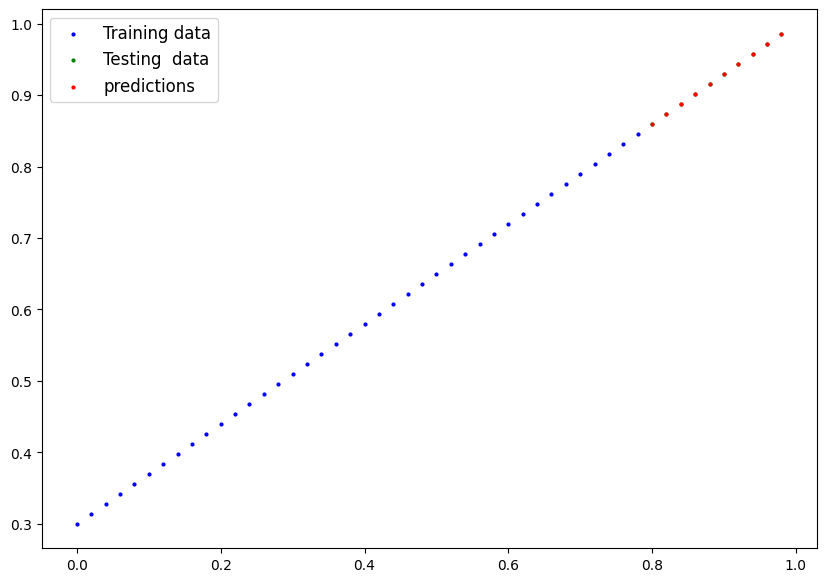

In [ ]:
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. create model save path
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)


saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
from google.colab import drive
drive.mount('/content/drive')